In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set()

In [3]:
train = pd.read_csv("loan_prediction_train.csv")
test = pd.read_csv("loan_prediction_test.csv")

In [4]:
train_original = train.copy()
test_original = test.copy()

In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [8]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

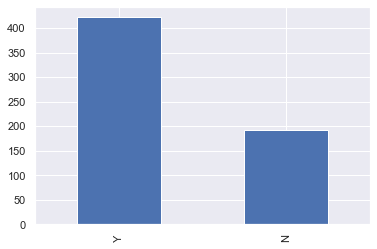

In [10]:
train['Loan_Status'].value_counts().plot.bar()

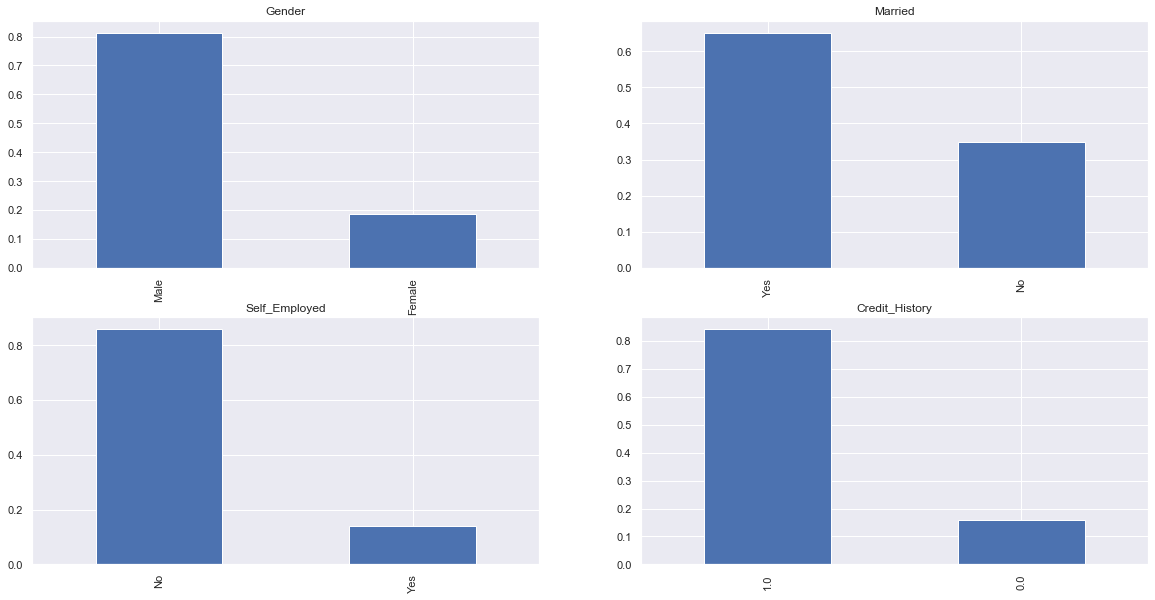

In [11]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

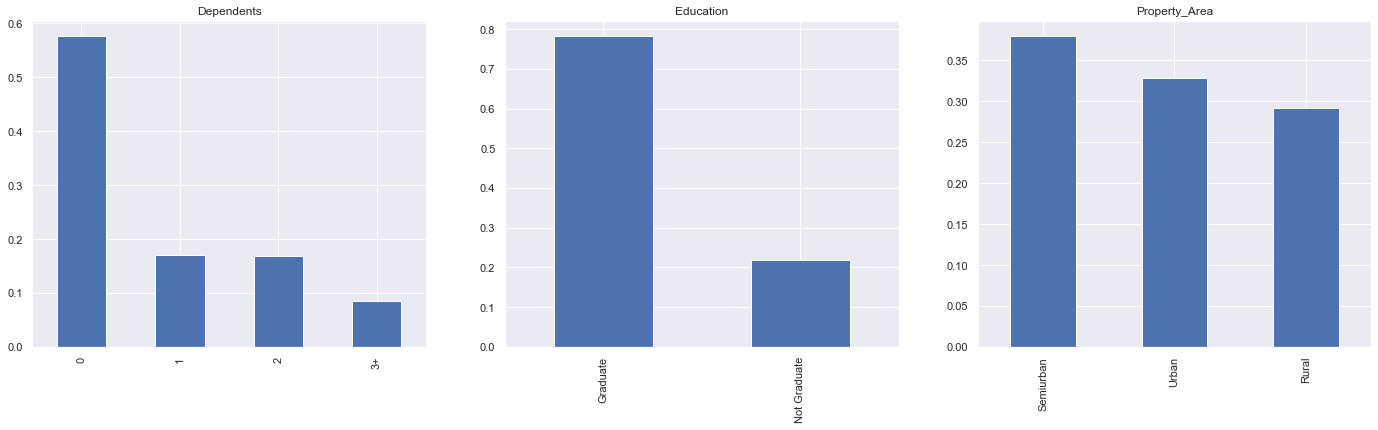

In [12]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

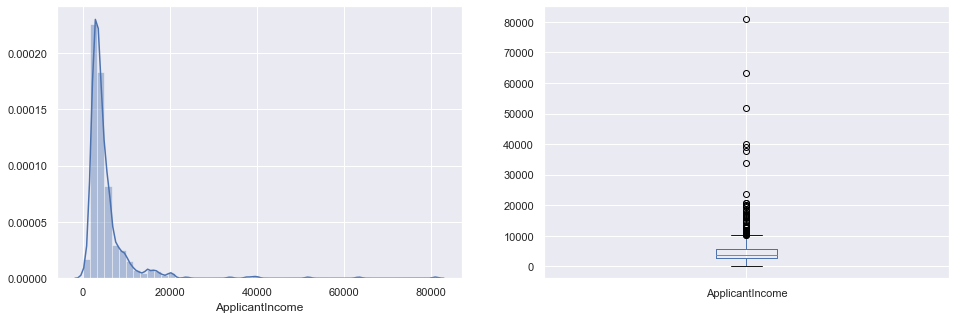

In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

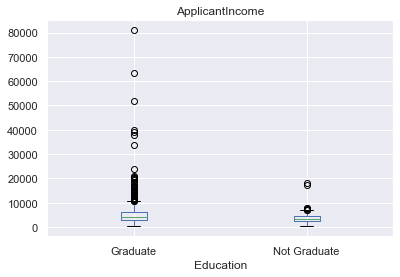

In [14]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

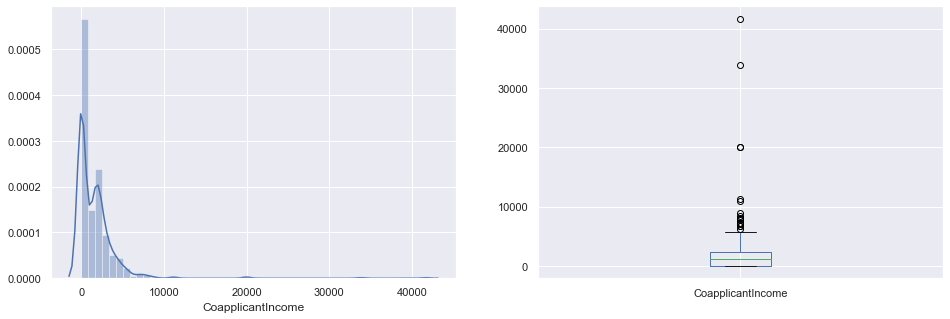

In [15]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

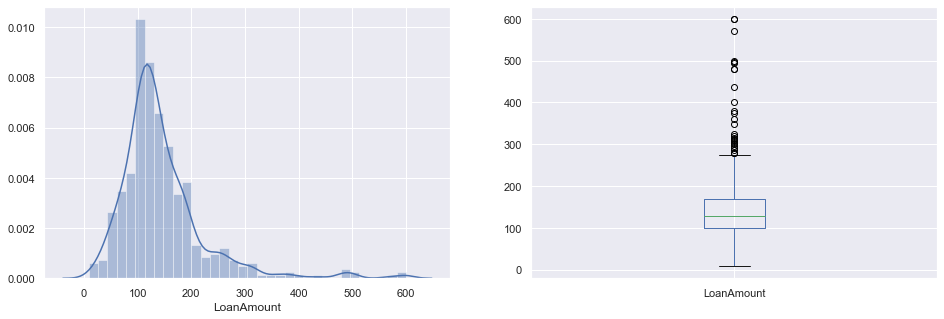

In [16]:
plt.figure(1)
plt.subplot(121)
train.dropna(inplace=True)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

In [17]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,32,54
Male,116,278


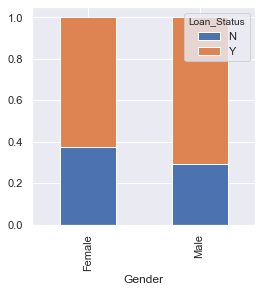

In [18]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

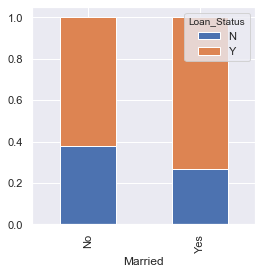

In [19]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

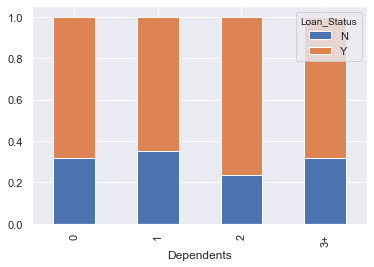

In [20]:
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.show()

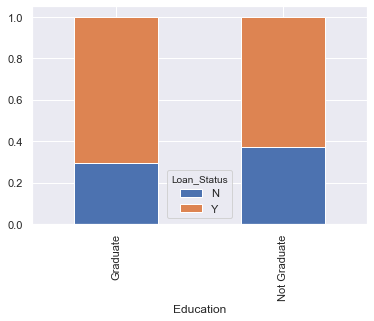

In [21]:
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.show()

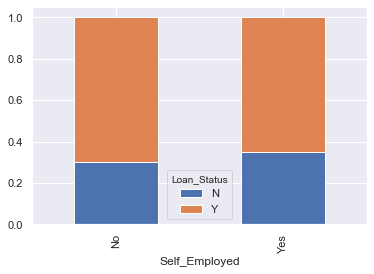

In [22]:
Self_Employed= pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.show()

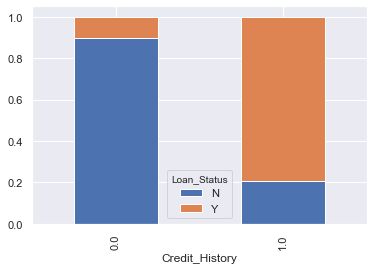

In [23]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.show()

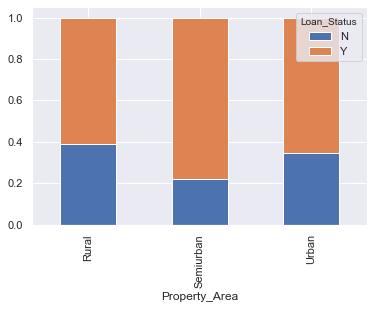

In [24]:
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.show()

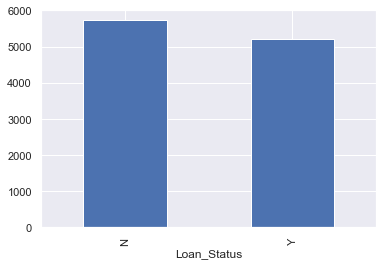

In [25]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

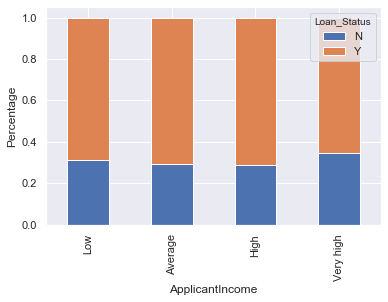

In [26]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Income_bin']= pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

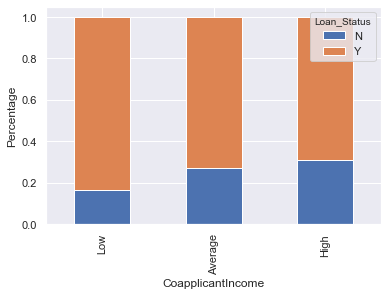

In [27]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("CoapplicantIncome")
plt.ylabel('Percentage')
plt.show()

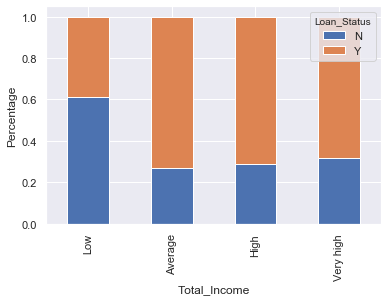

In [28]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')
plt.show()

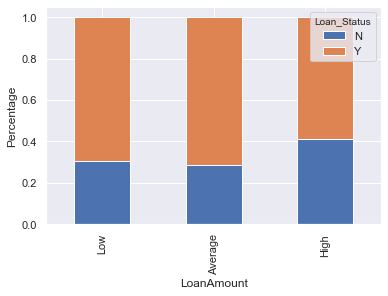

In [29]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')
plt.show()

In [30]:
train = train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'],axis=1)
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

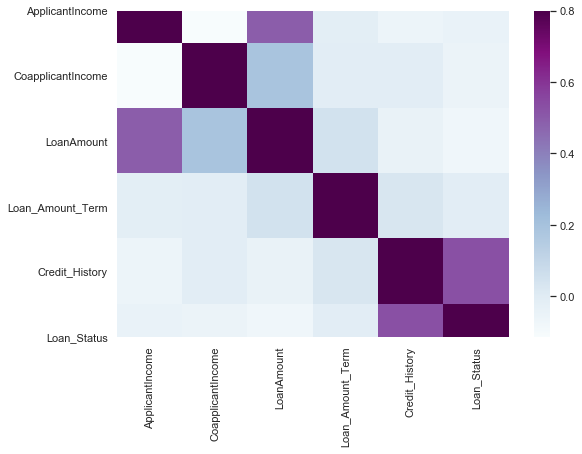

In [31]:
matrix=train.corr()
fig,ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu")
plt.show()

In [32]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

test.isnull().sum()

In [33]:
test['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

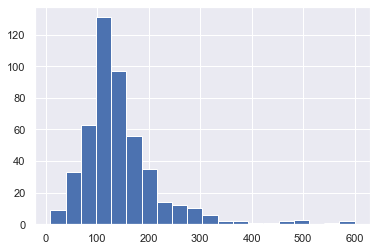

In [34]:
#Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer.
#This is called right skewness. One way to remove the skewness is by doing the log transformation. 
#As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. 
#So, we get a distribution similar to normal distribution.
train['LoanAmount'].hist(bins=20)
plt.show()

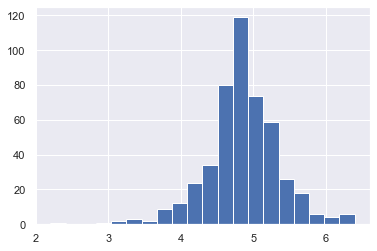

In [35]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
plt.show()

In [36]:
test['LoanAmount_log']=np.log(test['LoanAmount'])

In [37]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [38]:
X=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']
print(type(y))

<class 'pandas.core.series.Series'>


In [39]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3)

In [41]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
#Here the C parameter represents inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization.y

In [43]:
pred_cv=log.predict(X_cv)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_cv,pred_cv)

0.8055555555555556

In [45]:
pred_test=log.predict(test)

In [46]:
submission=pd.read_csv("Sample_Submission.csv")

In [47]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [48]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

#pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv(logistic.csv)

In [49]:
from sklearn.model_selection import KFold,cross_val_score
kfold=KFold(n_splits=5,random_state=1,shuffle=True)
cv_results=cross_val_score(log,X,y,cv=kfold,scoring='accuracy')
print(cv_results.mean(),cv_results.std())

0.80625 0.033333333333333326
